<h1 align="center"><strong>Deflexión de una membrana</strong></h1>

<div align="justify">
    Se busca evaluar la deflexión bidimensional $D(x,y)$ de una membrana circular, de radio $R$, sujeta  a una carga $p$ sobre la membrana. El modelo matemático que describe este comportamiento se puede apreciar en la Ecuación \ref{PDE}.
    <br>
    <br>
    $$
    \begin{equation}
        -T \nabla ^2 D = p \, \, \, \, \text{en} \, \, \Omega = \lbrace{(x,y) | x^2 + y^2 \leq R \rbrace}
        \tag{1}
        \label{PDE}
    \end{equation}
    $$
    <br>
    Dónde: $T$ es la tensión sobre la membrana (constante) y $p$ es la carga de presión externa. Sobre la frontera, la membrana no está deflectada $(D=0)$. La carga se puede modelar como una función Gaussiana:
    <br>
    <br>
    $$
    \begin{equation}
        p(x,y) = \frac{A}{2\pi \sigma} exp\left(-\frac{1}{2} \left(\frac{x-x_0}{\sigma} \right)^2 -\frac{1}{2} \left(\frac{y-y_0}{\sigma} \right)^2  \right)
        \tag{2}
        \label{p}
    \end{equation}
    $$
    <br>
    De la Ecuación \ref{p}, $A$ es la amplitud de la presión, $(x_0, y_0)$ es el punto donde la carga $p$ es máxima, y $\sigma$ es la "profundidad" de $p$. 
</div>

## __Planteamiento adimensional__

<div align="justify">
    Este tipo de planteamiento facilita la escalabilidad del proceso. Los parámetros adimensionales planteados:
</div>

* _Coordenadas adimensionales:_ $\bar{x} = x/R$ y $\bar{y} = y/R$.
* _Deflexión adimensional:_ $w = D/D_c$, dónde $D_c$ es el tamaño característico de la deflexión.
* _Relación radial:_ $\bar{R_0} = R_0/R$.

<div align="justify">
    Se obtiene lo siguiente:
    $$
    \begin{equation}
        -\frac{\partial ^2 w}{\partial \bar{x}^2}-\frac{\partial ^2 w}{\partial \bar{y}^2} = \alpha \, exp\left(-\beta ^2 \left(\bar{x}^2 + \left(\bar{y} - \bar{R_0} \right)^2 \right) \right) \, \, \text{para} \, \bar{x}^2+\bar{y}^2 < 1
        \tag{3}
        \label{ad}
    \end{equation}
    $$
    Dónde:
    $$
    \begin{equation}
        \alpha = \frac{R^2A}{2\pi TD_c\sigma} \, , \, \beta = \frac{R}{\sqrt{2}\sigma}
    \end{equation}
    $$
    El problema escalado se expresa matemáticamente de la siguiente forma $(\alpha=4)$:
    <br>
    <br>
    $$
    \begin{equation}
        -\nabla ^2 w = 4 \, exp\left(-\beta ^2 \left(x^2 + \left(y-R_0 \right)^2 \right) \right)
        \tag{4}
        \label{scaled}
    \end{equation}
    $$
    <br>
    Para ser resuelto sobre el disco unitario con $w=0$ sobre la frontera. Hay dos parámetros a variar: la presión adimensional, $\beta$, y el pico de presión localizado, $R_0 \in [0,1]$. Como $\beta \rightarrow 0$, la solución se acerca al caso especial de $w = 1-x^2-y^2$. Dada una solución escalada $w$, la deflexión física se puede calcular mediante la Ecuación \ref{def}.
    <br>
    <br>
    $$
    \begin{equation}
        D = \frac{AR^2}{8\pi \sigma T}w
        \tag{5}
        \label{def}
    \end{equation}
    $$
</div>

error_L2 =  0.02603555374072317
error_max =  0.06005503703955702


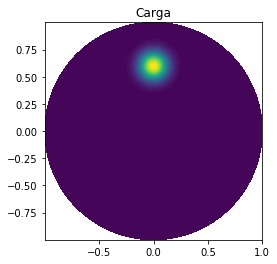

In [3]:
%matplotlib inline
from fenics import *
from mshr import *
import numpy as np

#Creación de malla y definición del espacio
domain = Circle(Point(0,0),1)
mesh = generate_mesh(domain, 64)
V = FunctionSpace(mesh, 'P', 1)

#Definición de las cargas
beta = 8
R0 = 0.6
p = Expression('4*exp(-pow(beta,2)*(pow(x[0],2) + pow(x[1]-R0,2)))', 
               degree=1, beta=beta, R0=R0)    #x[0], x[1], x[2] son: x,y,z

#Condiciones de frontera
w_D = Constant(0)

def boundary(x, on_boundary):
    #Retorna True si el punto x está en la condición de frontera.
    return on_boundary

bc = DirichletBC(V, w_D, boundary) 

#Definición del problema variacional
w = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(w), grad(v))*dx  #Especifica la PDE a resolver  
L = p*v*dx

#Computación de soluciones
w = Function(V)    #Se redefine la variable u (reemplaza su significado)
solve(a == L, w, bc)

#Graficar solución y malla
p = interpolate(p, V)
plot(w, title="Deflection")
#plot(p, title="Carga")
#plot(mesh)

#Guardar solución en un archivo formato VTK
vtkfile_w = File('poisson_membrane/deflection.pvd')
vtkfile_w << w
vtkfile_p = File('poisson_membrane/load.pvd')
vtkfile_p << p

#Computación de error en normativa L2
error_L2 = errornorm(w_D, w, 'L2')

#Computación máxima del error en los vértices
vertex_values_w_D = w_D.compute_vertex_values(mesh)
vertex_values_w = w.compute_vertex_values(mesh)
error_max = np.max(np.abs(vertex_values_w_D - vertex_values_w))

#Impresión de errores
print('error_L2 = ', error_L2)
print('error_max = ', error_max)

#Mantener la gráfica
#interactive()

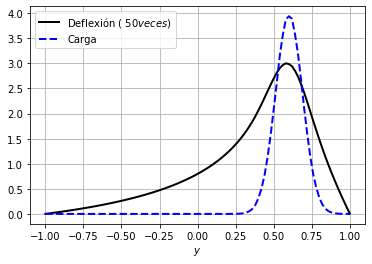

In [2]:
#Curva gráfica sobre x = 0. Comparación entre p y w
import numpy as np
import matplotlib.pyplot as plt
tol = 0.001   #Evita colisión de puntos por fuera del dominio
y = np.linspace(-1+tol, 1-tol, 101)
points = [(0,y_) for y_ in y]    #puntos 2D
w_line = np.array([w(point) for point in points])
p_line = np.array([p(point) for point in points])
plt.plot(y, 50*w_line, 'k', linewidth=2)    #Escala w 50 veces
plt.plot(y, p_line, 'b--', linewidth=2)
plt.grid(True)
plt.xlabel("$y$")
plt.legend(["Deflexión ($\\ 50 veces$)", "Carga"], loc="upper left")
plt.savefig("poisson_membrane/curves.pdf")
plt.savefig("poisson_membrane/curves.png")